#Main Data PreProcessing

In [1]:

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
#---------------------------------------
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder
#----------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 89% 132M/149M [00:00<00:00, 221MB/s]
100% 149M/149M [00:00<00:00, 218MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
batch_size = 32
img_size = (224, 224)
train_dataset = image_dataset_from_directory(directory = "/content/Training",
                                       labels = "inferred",
                                       label_mode="categorical",
                                       color_mode = "rgb",
                                       batch_size = 32,
                                       image_size = img_size,
                                       shuffle = True,
                                       validation_split = 0.2,
                                       subset = "training",
                                       seed = 30,
                                      )
val_dataset = image_dataset_from_directory(directory = "/content/Training",
                                           labels = "inferred",
                                           label_mode="categorical",
                                           color_mode = "rgb",
                                           batch_size = 32,
                                           image_size = img_size,
                                           shuffle = True,
                                           validation_split = 0.2,
                                           subset = "validation",
                                           seed = 30,
                                           )

test_dataset = image_dataset_from_directory(directory = "/content/Testing",
                                            labels = "inferred",
                                            label_mode="categorical",
                                            color_mode = "rgb",
                                            image_size = img_size,
                                            shuffle = False
                                            )


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


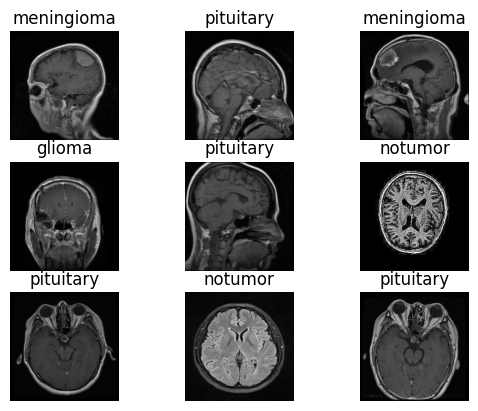

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.keras.utils.array_to_img(images[i]))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")


In [6]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class names:", class_names)

Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [7]:
for images, labels in train_dataset.take(1):
    print("Shape of one-hot encoded labels:", labels.shape)
    print("Example of one-hot encoded labels for the first batch:")
    print(labels.numpy())

Shape of one-hot encoded labels: (32, 4)
Example of one-hot encoded labels for the first batch:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


#FeedForward

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

img_shape = (224, 224, 3)
class_count = 4

# Define data augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

model = models.Sequential([
    layers.Flatten(input_shape=img_shape),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(class_count, activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_dataset, validation_data=val_dataset, epochs=20)


Epoch 1/20
143/143 [==============================] - 109s 746ms/step - loss: 513.5624 - accuracy: 0.2886 - val_loss: 60.2125 - val_accuracy: 0.3301
Epoch 2/20
143/143 [==============================] - 107s 735ms/step - loss: 54.4136 - accuracy: 0.2641 - val_loss: 2.5309 - val_accuracy: 0.2574
Epoch 3/20
143/143 [==============================] - 106s 738ms/step - loss: 3.6447 - accuracy: 0.2586 - val_loss: 2.3490 - val_accuracy: 0.2574
Epoch 4/20
143/143 [==============================] - 106s 736ms/step - loss: 3.0147 - accuracy: 0.2764 - val_loss: 2.1945 - val_accuracy: 0.2609
Epoch 5/20
143/143 [==============================] - 108s 748ms/step - loss: 2.3924 - accuracy: 0.2827 - val_loss: 2.0633 - val_accuracy: 0.2609
Epoch 6/20
143/143 [==============================] - 107s 736ms/step - loss: 2.3042 - accuracy: 0.2827 - val_loss: 1.9527 - val_accuracy: 0.2609
Epoch 7/20
143/143 [==============================] - 107s 741ms/step - loss: 2.2641 - accuracy: 0.2842 - val_loss: 1.86

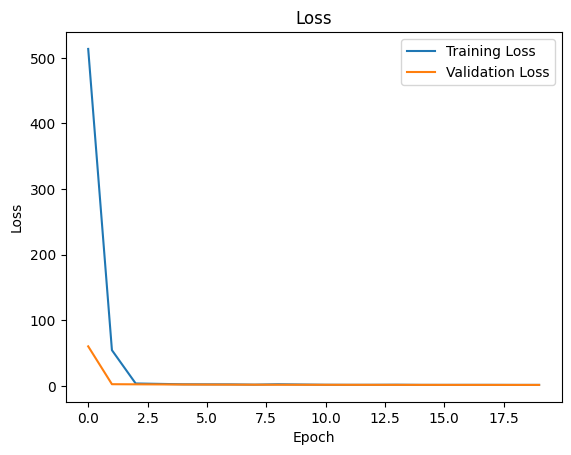

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

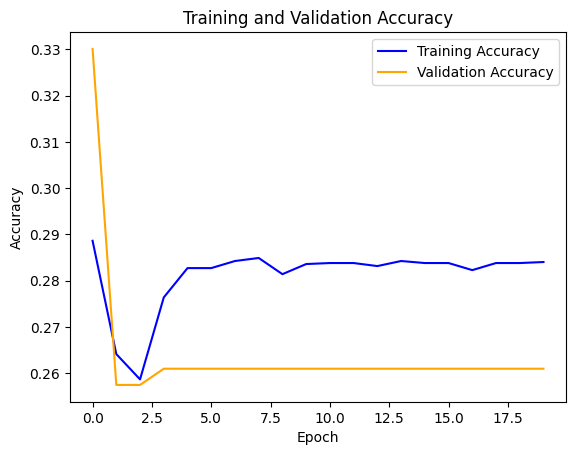

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_score = model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 6s 154ms/step - loss: 1.4261 - accuracy: 0.3089


In [ ]:
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 1.4260777235031128
Test accuracy: 0.30892449617385864


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 5s 109ms/step


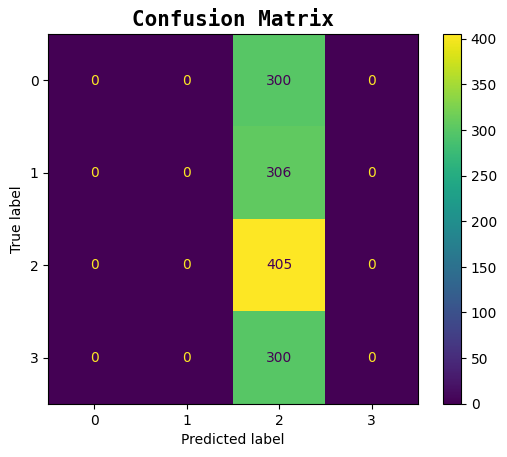

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.00      0.00      0.00       306
           2       0.31      1.00      0.47       405
           3       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.08      0.25      0.12      1311
weighted avg       0.10      0.31      0.15      1311



#CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
img_shape = (224, 224, 3)
class_count = 4
# Define data augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
CNN_Model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolutional to fully connected layers
    Flatten(),
    # Fully connected layers
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(class_count, activation='softmax')  # Output layer
])
CNN_Model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
CNN_Model.summary()
hist= CNN_Model.fit(train_dataset, validation_data=val_dataset, epochs=20)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

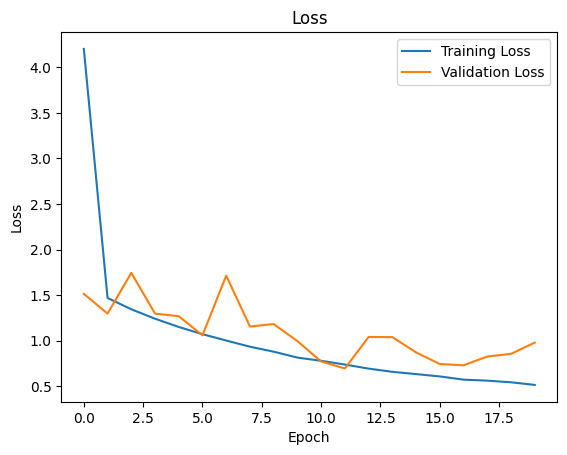

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

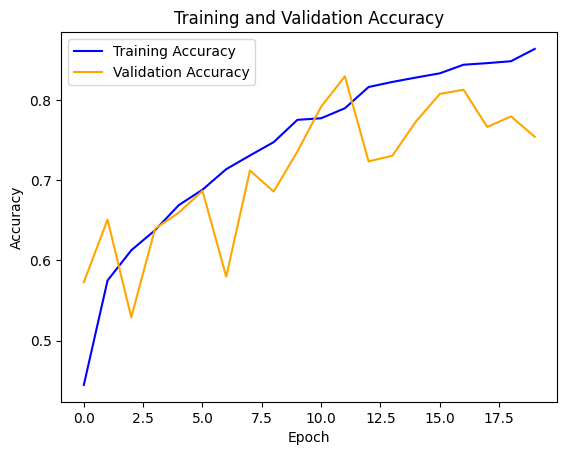

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
CNNtest_score = CNN_Model.evaluate(test_dataset, verbose= 1)

NameError: name 'CNN_Model' is not defined

In [ ]:
print('Test loss:', CNNtest_score[0])
print('Test accuracy:', CNNtest_score[1])

In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = CNN_Model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


#VGG 16 PreTrained


In [22]:
# The default input size for this model is 224x224.
img_height, img_width = 224, 224
batch_size = 32

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
img_shape = (224, 224, 3)
class_count = 4
vgg16_model = Sequential()
pretrained_model = tf.keras.applications.VGG16(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
vgg16_model.add(pretrained_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dense(class_count, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
# Compile and train the model
vgg16_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg16_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
143/143 [==============================] - 46s 260ms/step - loss: 4.3043 - accuracy: 0.6713 - val_loss: 3.5764 - val_accuracy: 0.7075
Epoch 2/20
143/143 [==============================] - 25s 170ms/step - loss: 1.7135 - accuracy: 0.8298 - val_loss: 1.9066 - val_accuracy: 0.8179
Epoch 3/20
143/143 [==============================] - 25s 171ms/step - loss: 1.1535 - accuracy: 0.8621 - val_loss: 2.1053 - val_accuracy: 0.7890
Epoch 4/20
143/143 [==============================] - 26s 176ms/step - loss: 0.8316 - accuracy: 0.8825 - val_loss: 1.5938 - val_accuracy: 0.8564
Epoch 5/20
143/143 [==============================] - 26s 178ms/step - loss: 0.5659 - accuracy: 0.9094 - val_loss: 1.2035 - val_accuracy: 0.8564
Epoch 6/20
143/143 [==============================] - 25s 170ms/step - loss: 0.5077 - accuracy: 0.9199 - val_loss: 1.0042 - val_accuracy: 0.8905
Epoch 7/20
143/143 [==============================] - 26s 179ms/step - loss: 0.4096 - accuracy: 0.9289 - val_loss: 0.9108 - val_ac

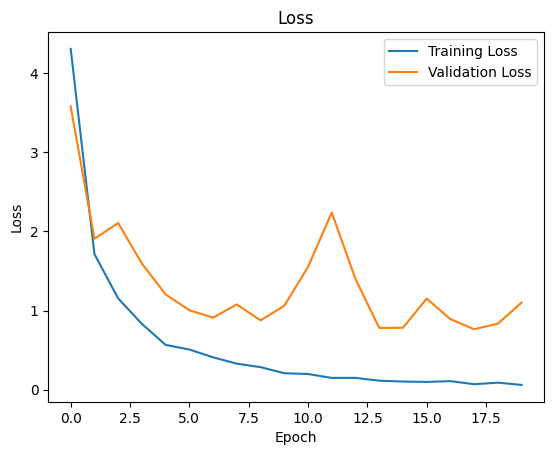

In [25]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

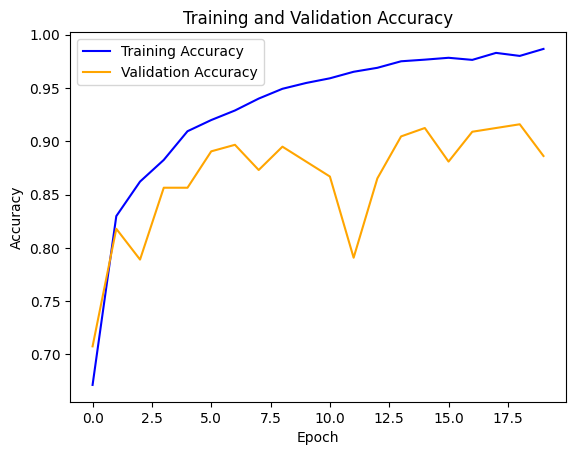

In [26]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
score = vgg16_model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 12s 304ms/step - loss: 1.0223 - accuracy: 0.8947


In [28]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0223491191864014
Test accuracy: 0.8947368264198303


In [29]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [30]:
y_true = np.argmax(y_true, axis=1)
y_pred = vgg16_model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 5s 131ms/step


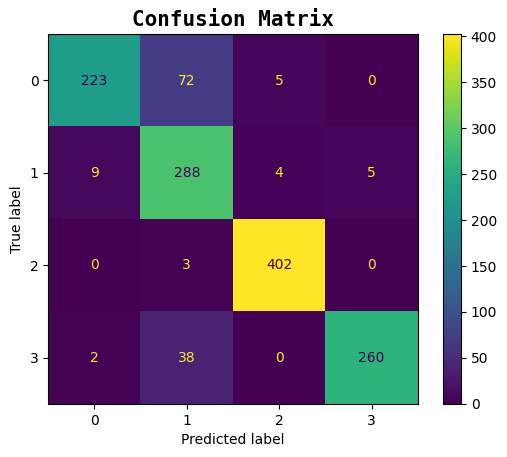

In [31]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.74      0.84       300
           1       0.72      0.94      0.81       306
           2       0.98      0.99      0.99       405
           3       0.98      0.87      0.92       300

    accuracy                           0.89      1311
   macro avg       0.91      0.89      0.89      1311
weighted avg       0.91      0.89      0.90      1311



#ResNet 50

In [11]:
# Define the image size and batch size
img_height, img_width = 224, 224
batch_size = 32

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
img_shape = (224, 224, 3)
class_count = 4
# Create the ResNet50 model and set the layers to be non-trainable
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='max',
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(class_count, activation='softmax'))

In [13]:
# Compile and train the model
resnet_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = resnet_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
143/143 [==============================] - 31s 164ms/step - loss: 1.5535 - accuracy: 0.7193 - val_loss: 0.7780 - val_accuracy: 0.8284
Epoch 2/20
143/143 [==============================] - 19s 130ms/step - loss: 0.5634 - accuracy: 0.8562 - val_loss: 0.5015 - val_accuracy: 0.8748
Epoch 3/20
143/143 [==============================] - 21s 145ms/step - loss: 0.3759 - accuracy: 0.9013 - val_loss: 0.4053 - val_accuracy: 0.8818
Epoch 4/20
143/143 [==============================] - 23s 152ms/step - loss: 0.2991 - accuracy: 0.9164 - val_loss: 0.3329 - val_accuracy: 0.9142
Epoch 5/20
143/143 [==============================] - 20s 137ms/step - loss: 0.2254 - accuracy: 0.9295 - val_loss: 0.3432 - val_accuracy: 0.9072
Epoch 6/20
143/143 [==============================] - 19s 132ms/step - loss: 0.1986 - accuracy: 0.9394 - val_loss: 0.2512 - val_accuracy: 0.9352
Epoch 7/20
143/143 [==============================] - 19s 128ms/step - loss: 0.1679 - accuracy: 0.9527 - val_loss: 0.2989 - val_ac

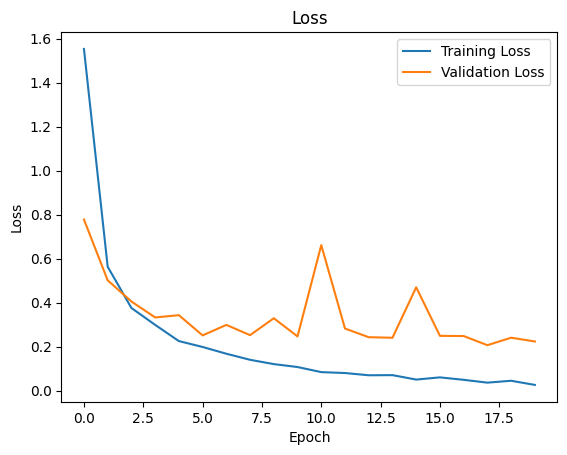

In [14]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


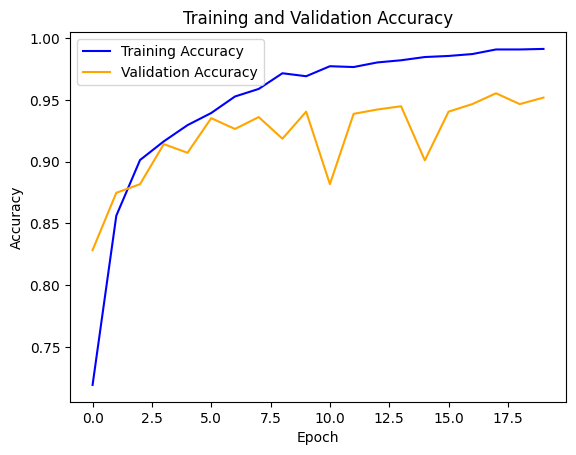

In [15]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [16]:
score = resnet_model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 6s 153ms/step - loss: 0.2249 - accuracy: 0.9489


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22494296729564667
Test accuracy: 0.9488939642906189


In [18]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [19]:
y_true = np.argmax(y_true, axis=1)
y_pred = resnet_model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 5s 96ms/step


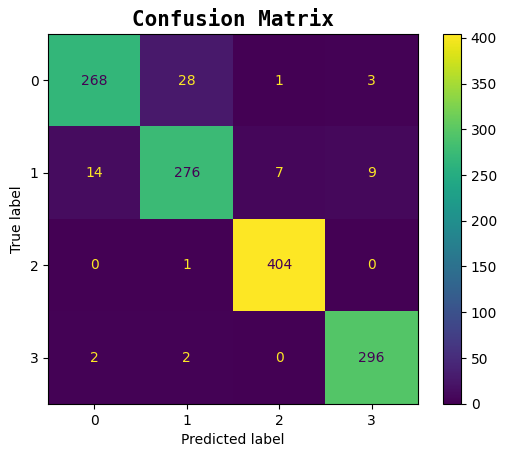

In [20]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       300
           1       0.90      0.90      0.90       306
           2       0.98      1.00      0.99       405
           3       0.96      0.99      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.94      0.95      1311
weighted avg       0.95      0.95      0.95      1311



# InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
img_shape = (224, 224, 3)
class_count = 4
# Define data augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])
# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

InceptionV33 = Sequential()
pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                  input_shape=img_shape,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
InceptionV33.add(pretrained_model)
InceptionV33.add(layers.Flatten())
InceptionV33.add(layers.Dense(512, activation='relu'))
InceptionV33.add(layers.Dense(4, activation='softmax'))

InceptionV33.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = InceptionV33.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
143/143 [==============================] - 751s 5s/step - loss: 18.5636 - accuracy: 0.3976 - val_loss: 11.3687 - val_accuracy: 0.3774
Epoch 2/20
143/143 [==============================] - 113s 786ms/step - loss: 6.4370 - accuracy: 0.4678 - val_loss: 3.4463 - val_accuracy: 0.4273
Epoch 3/20
143/143 [==============================] - 116s 809ms/step - loss: 1.8089 - accuracy: 0.4661 - val_loss: 1.6211 - val_accuracy: 0.4194
Epoch 4/20
143/143 [==============================] - 112s 775ms/step - loss: 1.2578 - accuracy: 0.4856 - val_loss: 1.2307 - val_accuracy: 0.4606
Epoch 5/20
143/143 [==============================] - 114s 791ms/step - loss: 1.1630 - accuracy: 0.5234 - val_loss: 1.1442 - val_accuracy: 0.5228
Epoch 6/20
143/143 [==============================] - 113s 782ms/step - loss: 1.1159 - accuracy: 0.5354 - val_loss: 1.2480 - val_accuracy: 0.5026
Epoch 7/20
143/143 [==============================] - 112s 779ms/step - loss: 1.0714 - accuracy: 0.5429 - val_loss: 1.2228 - 

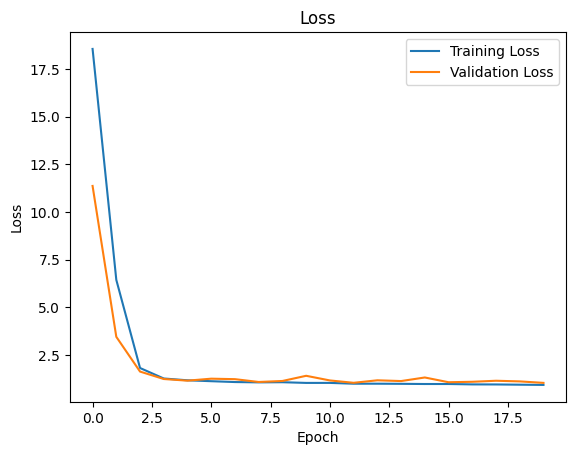

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

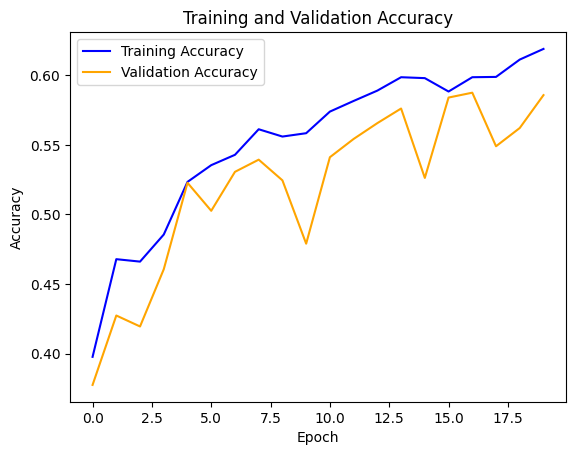

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = InceptionV33.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 213s 5s/step - loss: 1.1907 - accuracy: 0.5454


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1907284259796143
Test accuracy: 0.5453851819038391


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = InceptionV33.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 7s 137ms/step


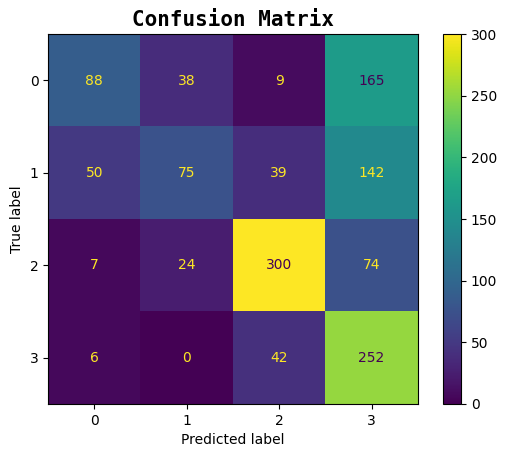

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.58      0.29      0.39       300
           1       0.55      0.25      0.34       306
           2       0.77      0.74      0.75       405
           3       0.40      0.84      0.54       300

    accuracy                           0.55      1311
   macro avg       0.57      0.53      0.51      1311
weighted avg       0.59      0.55      0.53      1311



# DenseNet121

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
img_shape = (224, 224, 3)
class_count = 4
# Define data augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])
# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
DenseNet121 = Sequential()
pretrained_model = tf.keras.applications.DenseNet121(include_top=False,
                                                  input_shape=img_shape,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
DenseNet121.add(pretrained_model)
DenseNet121.add(layers.Flatten())
DenseNet121.add(layers.Dense(512, activation='relu'))
DenseNet121.add(layers.Dense(class_count, activation='softmax'))
DenseNet121.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = DenseNet121.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
143/143 [==============================] - 343s 2s/step - loss: 5.1597 - accuracy: 0.3748 - val_loss: 2.8223 - val_accuracy: 0.4667
Epoch 2/20
143/143 [==============================] - 294s 2s/step - loss: 3.1050 - accuracy: 0.4794 - val_loss: 3.0179 - val_accuracy: 0.3923
Epoch 3/20
143/143 [==============================] - 314s 2s/step - loss: 2.3148 - accuracy: 0.5042 - val_loss: 2.4212 - val_accuracy: 0.4098
Epoch 4/20
143/143 [==============================] - 303s 2s/step - loss: 1.8790 - accuracy: 0.5357 - val_loss: 2.3735 - val_accuracy: 0.3879
Epoch 5/20
143/143 [==============================] - 303s 2s/step - loss: 1.6514 - accuracy: 0.5488 - val_loss: 1.9755 - val_accuracy: 0.4492
Epoch 6/20
143/143 [==============================] - 296s 2s/step - loss: 1.5364 - accuracy: 0.5711 - val_loss: 1.6845 - val_accuracy: 0.4886
Epoch 7/20
143/143 [==============================] - 295s 2s/step - loss: 1.4826 - accuracy: 0.5812 - val_loss: 1.9992 - val_accuracy: 0.4124

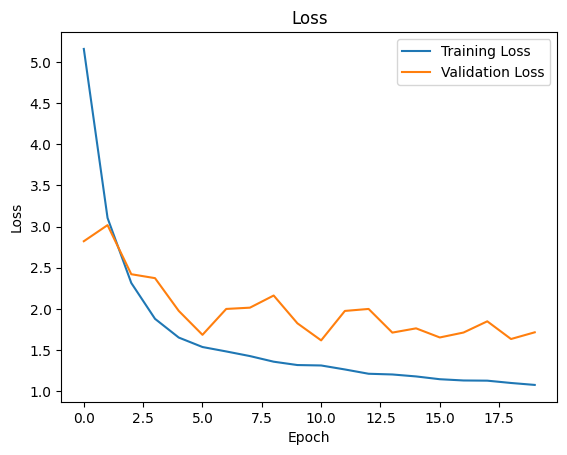

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

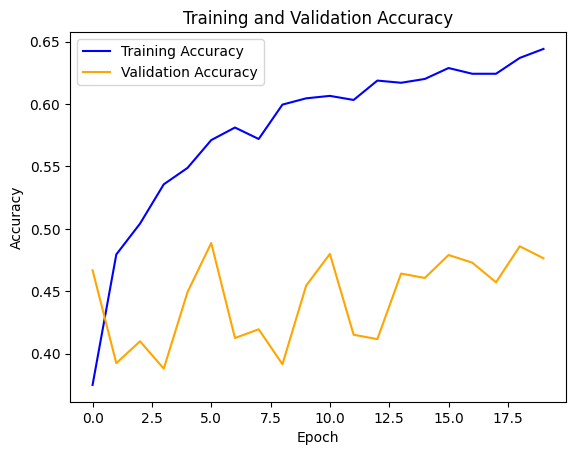

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = DenseNet121.evaluate(test_dataset, verbose = 0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8020533323287964
Test accuracy: 0.48360031843185425


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = DenseNet121.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 9s 144ms/step


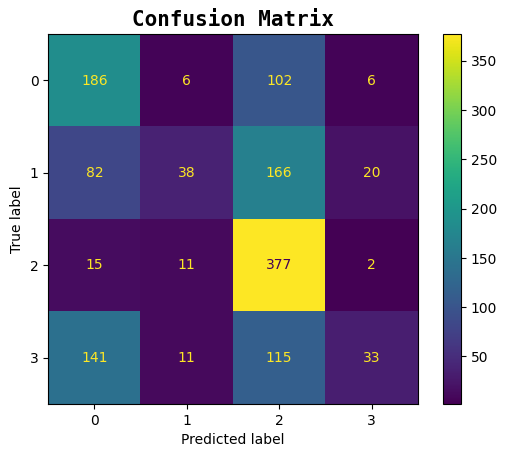

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.62      0.51       300
           1       0.58      0.12      0.20       306
           2       0.50      0.93      0.65       405
           3       0.54      0.11      0.18       300

    accuracy                           0.48      1311
   macro avg       0.51      0.45      0.39      1311
weighted avg       0.51      0.48      0.41      1311

